# Topic : How does the round off error affect the reliablity of the simulation nonlinear dynamical system?

You can get details in [My website](https://munjungkim.github.io/post/lorenz_wheel/)

Here, we are going to solve the Lorenz equation of Malkus-wheel with RK-4 (4th order Runge-Kutta)

-----

$w(t)$ : angular velocity of the water wheel

$\theta$ : angular velocity of the water wheel

$Q(\theta)$ : The rate at which water is pumped in. (Note : This function is independent with time $t$.

$r$ : radius of the wheel

$m(\theta,t)$ : mass distribution of water around rim

-----

and after some calculation (see the website), we have to calcualate


----
$\dot{a_1} : -Ka_1 + wb_1$

$\dot{b_1} : q_1 - Kb_1 - wa_1$

$I\dot{w} = -vw + gra_1\pi$

----

where $a_n(t)$ and $b_n(t)$ are coefficients of the fourier series of $m(\theta,t)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Malkus_function import Malkus
from RK4 import *
from Lorenz_function import Lorenz
from tqdm import tqdm

# Lorenz system

In [30]:
p_list_lorenz= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,3000)

In [283]:
(5+1+3)*5/(5-1-1)

15.0

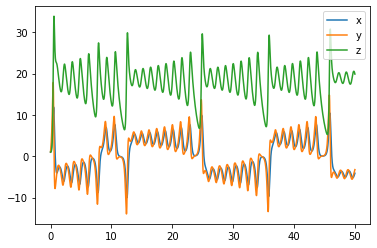

In [39]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][0],label='x')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][1],label='y')
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label='z')
plt.legend()
plt.savefig('Lorenz_timeseries.png')

In [4]:
p_list_lorenz[0][2][3000]

22.40954286673684

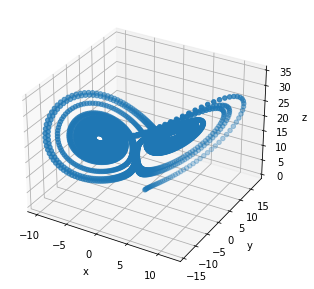

In [40]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_lorenz[0][0,:],p_list_lorenz[0][1,:],p_list_lorenz[0][2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('Lorenz_3dplot.png')

In [6]:
s=5
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

bifurcation point should be 15.0


# Initial Condition Sensitivity

# RK4

### difference > machine epsilon

In [102]:
p_list_lorenz= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,5000)
p_list_lorenz2= RK4_3variable(1,1,1,Lorenz(s=5,r=20+0.00001,b=1).Lorenz_func,0.01,5000)

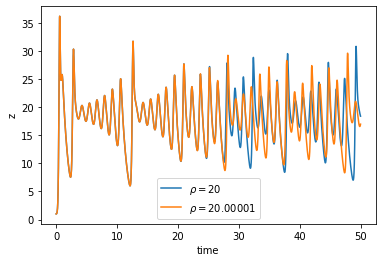

In [74]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label=r'$\rho=20$')
plt.plot(p_list_lorenz2[1],p_list_lorenz2[0][2],label=r'$\rho=20.00001$')
plt.xlabel('time')
plt.ylabel('z')
plt.legend()
plt.savefig('ics_timeseries.png')


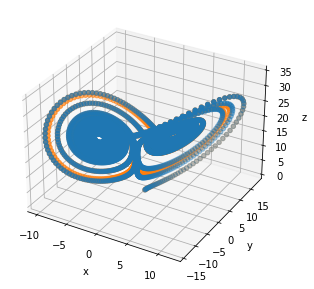

In [51]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_lorenz2[0][0,:],p_list_lorenz2[0][1,:],p_list_lorenz2[0][2,:])
ax.scatter(p_list_lorenz[0][0,:],p_list_lorenz[0][1,:],p_list_lorenz[0][2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('ics_3d.png')

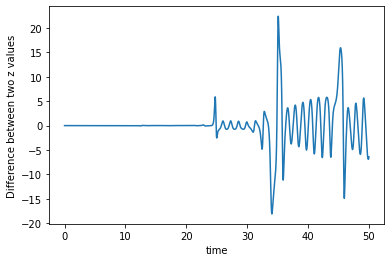

In [56]:
plt.plot(p_list_lorenz[1],p_list_lorenz2[0][2]-p_list_lorenz[0][2])

plt.xlabel('time')
plt.ylabel('Difference between two z values')

plt.savefig('ics_difference.png')


### machine epsilon 

In [58]:
p_list_lorenz= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,5000)
p_list_lorenz2= RK4_3variable(1,1,1,Lorenz(s=5,r=20 + 0.00001,b=1).Lorenz_func,0.01,5000)

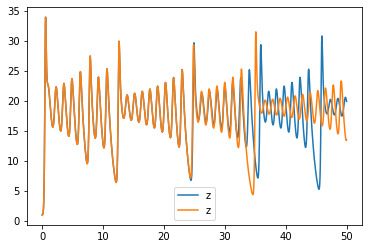

In [59]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label='z')
plt.plot(p_list_lorenz2[1],p_list_lorenz2[0][2],label='z')

plt.legend()
plt.savefig('wheel_timeseries.png')



# Euler

In [103]:
p_list_lorenz_euler= Euler(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,5000)
p_list_lorenz2_euler= Euler(1,1,1,Lorenz(s=5,r=20.000001,b=1).Lorenz_func,0.01,5000)

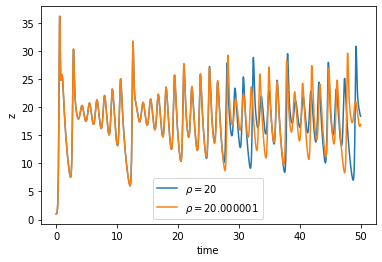

In [73]:
plt.plot(p_list_lorenz[1],p_list_lorenz[0][2],label=r'$\rho=20$')
plt.plot(p_list_lorenz2[1],p_list_lorenz2[0][2],label=r'$\rho=20.000001$')

plt.xlabel('time')
plt.ylabel('z')

plt.legend()
plt.savefig('euler_timeseries.png')


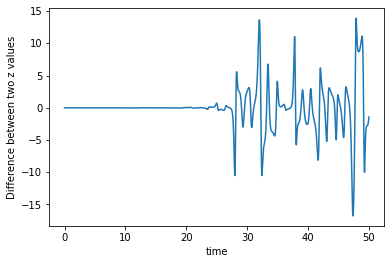

In [66]:
plt.plot(p_list_lorenz[1],p_list_lorenz2[0][2]-p_list_lorenz[0][2])

plt.xlabel('time')
plt.ylabel('Difference between two z values')

plt.savefig('euler_difference.png')

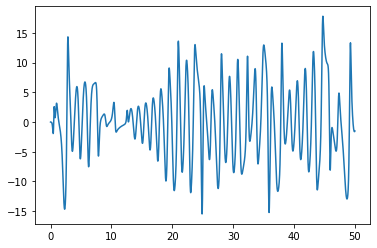

In [104]:
plt.plot(p_list_lorenz[1],p_list_lorenz_euler[0][2]-p_list_lorenz[0][2])



## Error control

In [86]:
p_list_lorenz_4= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,10000)

In [263]:
p_list_lorenz_5= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.0001,1000000)
p_list_lorenz_6= RK4_3variable(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.00001,10000000)

<ipython-input-230-c51f5bf22e48>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Timestep_sensitivity.png')
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


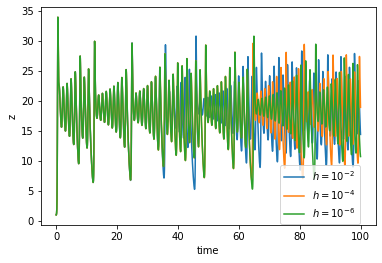

In [230]:
plt.plot(p_list_lorenz_4[1],p_list_lorenz_4[0][2],label=r'$h=10^{-2}$')
plt.plot(p_list_lorenz_5[1][:1000000],p_list_lorenz_5[0][2][:1000000],label=r'$h=10^{-4}$')
plt.plot(p_list_lorenz_6[1][:10000000],p_list_lorenz_6[0][2][:10000000],label=r'$h=10^{-6}$')

plt.legend(bbox_to_anchor = (0.7,0.3))
plt.xlabel('time')
plt.ylabel('z')
plt.savefig('Timestep_sensitivity.png')

In [252]:
len(p_list_lorenz_6[0][1,:])

50000001

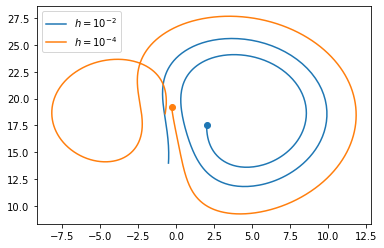

In [282]:
plt.scatter(p_list_lorenz_4[0][1,:][9400],p_list_lorenz_4[0][2,:][9400])
plt.scatter(p_list_lorenz_5[0][1,:][940000],p_list_lorenz_5[0][2,:][940000])
plt.plot(p_list_lorenz_4[0][1,:][9400:9700],p_list_lorenz_4[0][2,:][9400:9700],label=r'$h=10^{-2}$')
plt.plot(p_list_lorenz_5[0][1,:][940000:970000],p_list_lorenz_5[0][2,:][940000:970000],label=r'$h=10^{-4}$')
plt.legend()
plt.savefig('Lorenz_RK4_different_phase.png')

In [225]:
p_list_lorenz_4_euler= Euler(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.01,10000)

In [226]:
p_list_lorenz_5_euler= Euler(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.0001,1000000)
p_list_lorenz_6_euler= Euler(1,1,1,Lorenz(s=5,r=20,b=1).Lorenz_func,0.00001,10000000)

<ipython-input-231-8bfb539d25fa>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Timestep_sensitivity_euler.png')
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


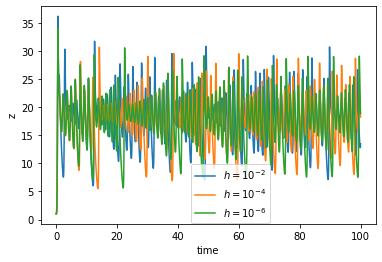

In [231]:
plt.plot(p_list_lorenz_4_euler[1],p_list_lorenz_4_euler[0][2],label=r'$h=10^{-2}$')
plt.plot(p_list_lorenz_5_euler[1][:1000000],p_list_lorenz_5_euler[0][2][:1000000],label=r'$h=10^{-4}$')
plt.plot(p_list_lorenz_6_euler[1][:10000000],p_list_lorenz_6_euler[0][2][:10000000],label=r'$h=10^{-6}$')

plt.legend(bbox_to_anchor = (0.7,0.3))
plt.xlabel('time')
plt.ylabel('z')
plt.savefig('Timestep_sensitivity_euler.png')

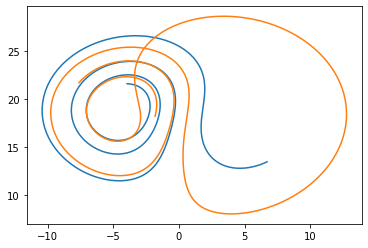

In [261]:

plt.plot(p_list_lorenz_4_euler[0][1,:][9500:],p_list_lorenz_4_euler[0][2,:][9500:],label=r'$\rho=20$')
plt.plot(p_list_lorenz_5_euler[0][1,:][950000:],p_list_lorenz_5_euler[0][2,:][950000:],label=r'$\rho=20$')

# Bifurcation

In [28]:
bifurcate_w = []
r_list = np.linspace(0,99,100)
for rho in tqdm(r_list):
    Lorenz_temp = Lorenz(s=5,r=rho,b=1)
    p_list_malkus= RK4_3variable(1,1,1,Lorenz(s=5,r=rho,b=1).Lorenz_func,0.01,3000)[0]
    bifurcate_w.append(p_list_malkus[2][3000])
    

100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


In [29]:
s=5
print(s)
print("bifurcation point should be",s*(s+1+3)/(s-1-1))

5
bifurcation point should be 15.0


In [30]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,0.1,100)/(K**2)/v,bifurcate_w)

NameError: name 'K' is not defined

# Malkus-wheel

In [124]:
v = 0.25
K = 0.5
r = 0.2
I = r**2

s = v/I/K
print(s)

r_should = s*(s+1+3)/(s-1-1)
print(r_should)
# print("bifurcation point r should be",r)
print("bifurcation point q should be",r_should*(K**2)*v/(np.pi*9.8*r))




12.499999999999998
19.642857142857142
bifurcation point q should be 0.19937868690903432


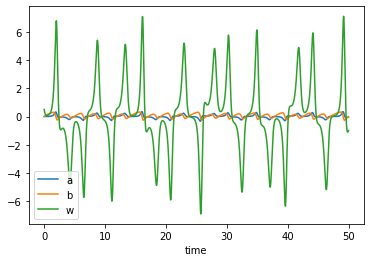

In [212]:
p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=0.3,v=0.25,K=0.5,r=0.2).malkus,0.01,5000)
plt.plot(p_list_malkus[1],p_list_malkus[0][0],label='a')
plt.plot(p_list_malkus[1],p_list_malkus[0][1],label='b')
plt.plot(p_list_malkus[1],p_list_malkus[0][2],label='w')
plt.legend()
plt.xlabel('time')
plt.savefig('RK4_lorenzwheel.png')

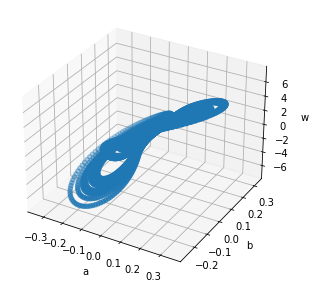

In [215]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0][0,:],p_list_malkus[0][1,:],p_list_malkus[0][2,:])
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('w')
plt.savefig('malkus-wheel_3d.png')

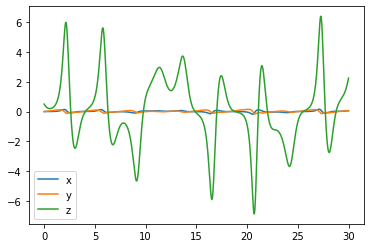

In [107]:
p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=0.09,v=0.1,K=0.1,r=0.2).malkus,0.01,3000)
plt.plot(p_list_malkus[1],p_list_malkus[0][0],label='x')
plt.plot(p_list_malkus[1],p_list_malkus[0][1],label='y')
plt.plot(p_list_malkus[1],p_list_malkus[0][2],label='z')
plt.legend()

## Bifurcation Diagram

In [163]:
bifurcate_w_1 = []
q_list = np.linspace(0,1,200)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=q,v=0.25,K=0.5,r=0.2).malkus,0.1,1000)[0]
    bifurcate_w_1.append(p_list_malkus[2,1000])

100%|██████████| 200/200 [00:04<00:00, 44.11it/s]


In [162]:
bifurcate_w_1

[0.0,
 1.2215852059815667e-15,
 3.29793269420817e-05,
 0.014140946824757028,
 0.0200995087429794,
 0.024657942462162245,
 0.028496280424669937,
 0.031875725467900795,
 0.034929725947692204,
 0.03773737661448782,
 0.04035013649203609,
 0.04280370883061429,
 0.04512406321694736,
 0.04733079700675327,
 0.04943912802306958,
 0.051461147147309094,
 0.053406641833446,
 0.05528366462037645,
 0.057099013046016334,
 0.05885879272248619,
 0.06056839608292487,
 0.06222921330837253,
 0.0638411160811167,
 0.06543502891999671,
 0.06693995070695279,
 0.06860110102238215,
 -0.06985700214088403,
 -0.0717737477492837,
 0.07340883941052287,
 0.07210268576265318,
 -0.07296381458005385,
 0.07466130598019652,
 -0.04147171693736274,
 -0.01630052183162095,
 -0.007138967228381154,
 -0.16795358700672067,
 0.01130783964692195,
 -0.16238727407153725,
 0.012361229663552145,
 0.04257448722436718,
 -0.0017665026715821576,
 -0.1305648763634182,
 0.00033305945177008805,
 0.013182880027493496,
 -0.05791032345401103,
 -

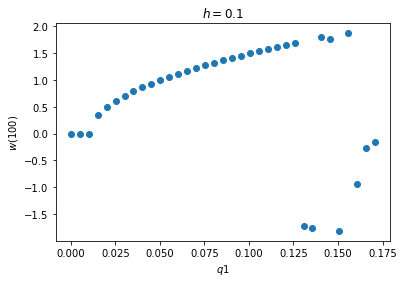

In [222]:
plt.scatter(np.linspace(0,1,200)[:35],bifurcate_w_1[:35])
plt.xlabel(r'$q1$')
plt.ylabel(r'$w(100)$')
plt.title(r'$h = 0.1$')
plt.savefig('bifurcation_rk4_1.png')



In [156]:
bifurcate_w = []
q_list = np.linspace(0,1,200)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=q,v=0.25,K=0.5,r=0.25).malkus,0.01,10000)[0]
    bifurcate_w.append(p_list_malkus[2,10000])

100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


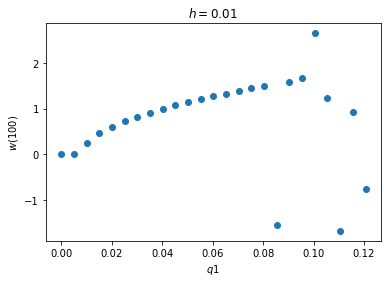

In [224]:
plt.scatter(np.linspace(0,1,200)[:25],bifurcate_w[:25])
plt.xlabel(r'$q1$')
plt.ylabel(r'$w(100)$')
plt.title(r'$h = 0.01$')
plt.savefig('bifurcation_RK4_2.png')

In [122]:
bifurcate_w_3 = []
q_list = np.linspace(0,1,200)
for q in tqdm(q_list):
    p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=q,v=0.25,K=0.5,r=0.25).malkus,0.001,100000)[0]
    bifurcate_w_3.append(p_list_malkus[2,100000])

100%|██████████| 200/200 [07:34<00:00,  2.27s/it]


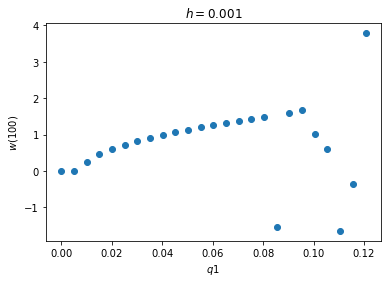

In [223]:
plt.scatter(np.linspace(0,1,200)[:25],bifurcate_w_3[:25])
plt.xlabel(r'$q1$')
plt.ylabel(r'$w(100)$')
plt.title(r'$h = 0.001$')
plt.savefig('bifurcation_RK4_3.png')

In [145]:
for i in range(1,len(bifurcate_w_3)):
    print(bifurcate_w_3[i]-bifurcate_w_3[i-1])
    if bifurcate_w_3[i]-bifurcate_w_3[i-1]<-0.05:
        print(i*0.001)
        break

6.465042018421594e-11
0.24376870057585953
0.21897830752072137
0.1445802456375111
0.116245814214333
0.09999816735374423
0.08910675587838313
0.08114934267919571
0.07500596148773553
0.07007724677176563
0.06600298241513314
0.06257432935332341
0.059645399780433594
0.0570980292222274
0.05467253629267632
0.05183918874616289
-3.0252778736511603
0.017


In [138]:
bifurcate_w_3

[9.575847991768644e-175,
 6.465042018421594e-11,
 0.24376870064050996,
 0.4627470081612313,
 0.6073272537987424,
 0.7235730680130754,
 0.8235712353668196,
 0.9126779912452028,
 0.9938273339243985,
 1.068833295412134,
 1.1389105421838996,
 1.2049135245990328,
 1.2674878539523562,
 1.3271332537327898,
 1.3842312829550172,
 1.4389038192476935,
 1.4907430079938564,
 -1.5345348656573041,
 1.5855723720555053,
 1.6750149497559392,
 1.0213612759738178,
 0.5956951454477204,
 -1.6485975912172217,
 -0.3667649240805729,
 3.7846304013123198,
 3.727569500827276,
 1.3026111710156696,
 0.6130726659985621,
 -0.5956295632396659,
 -3.323018480573958,
 1.7255125644427736,
 -0.4602508293165934,
 -3.4178459530718728,
 -0.43065546370863644,
 -0.7210001281297964,
 -3.4436202361562254,
 -0.9783172946473746,
 0.8566613916833627,
 0.3989718172489237,
 0.17653268595229393,
 3.205623768055797,
 -1.7378730374285773,
 1.1504346562456274,
 -0.16449323077120437,
 -1.1379580864105316,
 1.070112926613238,
 -2.6691301176

In [5]:
plt.scatter(np.pi*9.8*0.1*np.linspace(0,1,1000)/(0.5**2)/0.25,bifurcate_w)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$w(10)$')

NameError: name 'bifurcate_w' is not defined

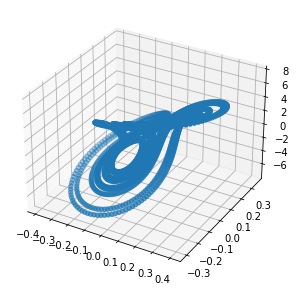

In [32]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D objec
ax.scatter(p_list_malkus[0,:],p_list_malkus[1,:],p_list_malkus[2,:])

In [8]:
import sys

from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QHBoxLayout, QLabel, QSizePolicy, QSlider, QSpacerItem, \
    QVBoxLayout, QWidget

import pyqtgraph as pg
import numpy as np


class Slider(QWidget):
    def __init__(self, minimum, maximum, parent=None):
        
        super(Slider, self).__init__(parent=parent)
        
        self.verticalLayout = QVBoxLayout(self)
        self.label = QLabel(self)
        self.verticalLayout.addWidget(self.label)
        self.horizontalLayout = QHBoxLayout()
        spacerItem = QSpacerItem(0, 20, QSizePolicy.Expanding, QSizePolicy.Minimum)
        self.horizontalLayout.addItem(spacerItem)
        self.slider = QSlider(self)
        self.slider.setOrientation(Qt.Vertical)
        self.horizontalLayout.addWidget(self.slider)
        spacerItem1 = QSpacerItem(0, 20, QSizePolicy.Expanding, QSizePolicy.Minimum)
        self.horizontalLayout.addItem(spacerItem1)
        self.verticalLayout.addLayout(self.horizontalLayout)
        self.resize(self.sizeHint())

        self.minimum = minimum
        self.maximum = maximum
        self.slider.valueChanged.connect(self.setLabelValue)
        self.x = None
        self.setLabelValue(self.slider.value())

    def setLabelValue(self, value):
        self.x = self.minimum + (float(value) / (self.slider.maximum() - self.slider.minimum())) * (
        self.maximum - self.minimum)
        self.label.setText("{0:.4g}".format(self.x))


class Widget(QWidget):
    def __init__(self, parent=None):
        super(Widget, self).__init__(parent=parent)
        self.horizontalLayout = QHBoxLayout(self)
        self.w1 = Slider(0.00, 0.9)
        self.horizontalLayout.addWidget(self.w1)


        self.win = pg.GraphicsWindow(title="Malkus-Lorenz Wheel")
        self.horizontalLayout.addWidget(self.win)
        self.p6 = self.win.addPlot(title="w")
        self.curve = self.p6.plot(pen='r')
        self.update_plot()

        self.w1.slider.valueChanged.connect(self.update_plot)


    def update_plot(self):
        a = self.w1.x
        p_list_malkus= RK4_3variable(0,0,0.5,Malkus(q1=a,v=0.25,K=0.5,r=0.25).malkus,0.01,3000)

        self.curve.setData(p_list_malkus[0][2])


if __name__ == '__main__':
    app = QApplication(sys.argv)
    w = Widget()
    w.show()
    sys.exit(app.exec_())

SystemExit: 0

/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
